# A Feasibility Analysis for Large Scale Blockchain-based Systems

Ikhlaq Sidhu, Alex Fred Ojala
UC Berkeley



In recent years, blockchain, bitcoin, and crypto-currency have become widely hyped as a cornerstone of a future digital world.  However, many questions exist about its scalability and effectiveness.  Further, any large scale Blockchain based system must still be implemented while considering a large number of design parameters. 

In a large system, we can expect 100M to 1B or more users.  And while its theoretically possible that each would keep there own node, a more likely deployment would define anywhere between 100 to 100M users sharing access to one node on a global blockchain network.  

In this analysis, we examine the performance, economics, and overall feasibility of large scale blockchain deployments. In particular, we seek to answer these questions:

1. How much storage capacity will be required in Nodes?
2. How much network bandwidth will be required for a large scale blockchain based system?
3. What design trade-offs exist for varying ratios of nodes to users?
4. What is the cost per user of such systems?
5. How does utility of the system scale with nodes and users.
6. How do these design parameters relate to the concepts of smart contracts.

Additional questions related to the feasibility of largescale blockchain-based systems include security, consensus-based performance, and energy cost considerations.




In [18]:
import matplotlib.pyplot as plt # always import pyplot module as plt (standard)
import numpy as np
import pandas as pd

### Storage and Compute Requirements:
To begin the analysis and discussion for this set of questions, we begin by creating a generalizable performance model for a large scale Blockchain-based system. 

In [19]:
# A model for performance and economic analyis
# variables and default values as sample calculaitons

u = 1e9  #number of global users
N = 1000 # number of full nodes which keep full history
m = 100   # message size in bytes per transaction 
ty = 1000 #transactions per user / year
t = ty/(365*3600*24) # average number of transaction / sec per user

print ("Assume prelimiary default parameter values")
print ("Users: %3.1e" %u)
print ("Nodes: ",N)
print ("Message Size in bytes/transaction: ", m)
print ("Transaction per year and per second per user: ", ty,t)
print ("The average transation data created per second in bytes is %3.1e" % (u*N*t))  


Assume prelimiary default parameter values
Users: 1.0e+09
Nodes:  1000
Message Size in bytes/transaction:  100
Transaction per year and per second per user:  1000 3.1709791983764585e-05
The average transation data created per second in bytes is 3.2e+07


![Architecture](bc1.jpg)

In [9]:
# Let B be the ratio of users to nodes
B = u/N
print (B, 'users exist on each node for the default settings')

1000000.0 users exist on each node for the default settings


To model the storage requirements S per year and per node, we first realize that each of the users u stores ty transactions of message size m per year.   The global storage requirement SG is the same but multiplied by the number of nodes N.  

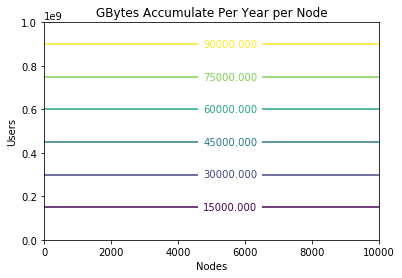

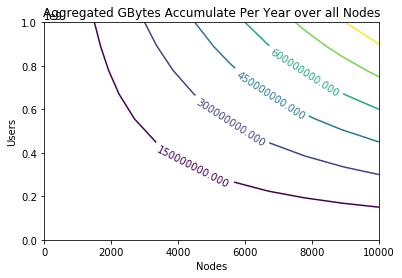

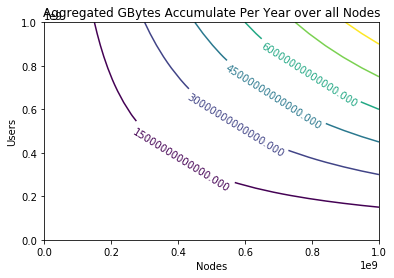

In [11]:
# Storage per node per year: S(u, N, m, ty) is linear in each variable

Nx = np.linspace(1,10000,10) 
ux = np.linspace(1,1e9,10)
#print (Nx, ux)
SN,Su = np.meshgrid(Nx,ux)
# SN is on axis 1, left to right in the matrix
# Su is on axis 0, up to down in the matrix
S = Su * m * ty / 10**9 # Storage in GBytes per node, and accumulated per year
np.set_printoptions(precision=2)
# print (S)

plt.figure()
cp = plt.contour(Nx, ux, S)
plt.clabel(cp, inline=True, fontsize=10)
plt.title('GBytes Accumulate Per Year per Node')
plt.xlabel('Nodes')
plt.ylabel('Users')
plt.show()

SG = SN * Su * m * ty / 10**9 # Storage in GBytes per node, and accumulated per year
plt.figure()
cp = plt.contour(Nx, ux, SG)
plt.clabel(cp, inline=True, fontsize=10)
plt.title('Aggregated GBytes Accumulate Per Year over all Nodes')
plt.xlabel('Nodes')
plt.ylabel('Users')
plt.show()

# In this next block, we produce similar results, except that we will examine the 
# cases where the number of users and the number of nodes are similar, that is closer to a 
# fully decentralized model

Nx = np.linspace(1,1e9,20) 
ux = np.linspace(1,1e9,20)
#print (Nx, ux)
SN,Su = np.meshgrid(Nx,ux)
# SN is on axis 1, left to right in the matrix
# Su is on axis 0, up to down in the matrix

SG = SN * Su * m * ty / 10**9 # Storage in GBytes per node, and accumulated per year
plt.figure()
cp = plt.contour(Nx, ux, SG)
plt.clabel(cp, inline=True, fontsize=10)
plt.title('Aggregated GBytes Accumulate Per Year over all Nodes')
plt.xlabel('Nodes')
plt.ylabel('Users')
plt.show()

Cost per GB today is entimated near .01 per GB, or 1 dollar per 100GB.  As this is raw memory, we can estimate 3 dollars/100GB for all extra loaded costs including packaging, services, software and electronics, to account for other aspects of the computing node.

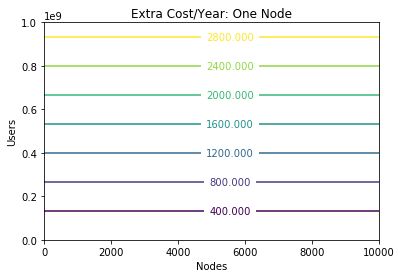

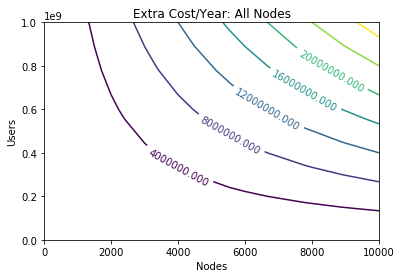

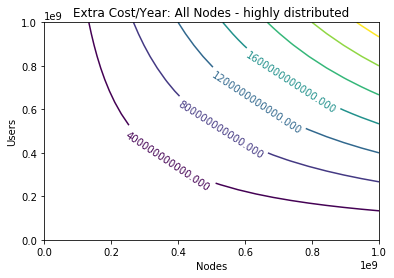

In [20]:
# Assumed memory cost
mc = 0.03 # in US dollars per GB

# Reset: 1-10K nodes
Nx = np.linspace(1,10000,10) 
ux = np.linspace(1,1e9,10)
#print (Nx, ux)

SN,Su = np.meshgrid(Nx,ux)
# SN is on axis 1, left to right in the matrix
# Su is on axis 0, up to down in the matrix
S = Su * m * ty / 10**9 # Storage in GBytes per node, and accumulated per year
np.set_printoptions(precision=2)
SG = SN * Su * m * ty / 10**9 # Storage in GBytes per node, and accumulated per year

plt.figure()
cp = plt.contour(Nx, ux, S*mc)
plt.clabel(cp, inline=True, 
          fontsize=10)
plt.title('Extra Cost/Year: One Node')
plt.xlabel('Nodes')
plt.ylabel('Users')
plt.show()

# --
# aggregate costs of all nodes
# Reset: 1-10K nodes
Nx = np.linspace(1,10000,10) 
ux = np.linspace(1,1e9,10)
#print (Nx, ux)

SN,Su = np.meshgrid(Nx,ux)
# SN is on axis 1, left to right in the matrix
# Su is on axis 0, up to down in the matrix
S = Su * m * ty / 10**9 # Storage in GBytes per node, and accumulated per year
np.set_printoptions(precision=2)
SG = SN * Su * m * ty / 10**9 # Storage in GBytes per node, and accumulated per year

plt.figure()
cp = plt.contour(Nx, ux, SG*mc)
plt.clabel(cp, inline=True, 
          fontsize=10)
plt.title('Extra Cost/Year: All Nodes')
plt.xlabel('Nodes')
plt.ylabel('Users')
plt.show()

# --
# aggregate cost when number of nodes are close to users
Nx = np.linspace(1,1e9,20) 
ux = np.linspace(1,1e9,20)
#print (Nx, ux)
SN,Su = np.meshgrid(Nx,ux)
# SN is on axis 1, left to right in the matrix
# Su is on axis 0, up to down in the matrix

SG = SN * Su * m * ty / 10**9 # Storage in GBytes per node, and accumulated per year
plt.figure()
cp = plt.contour(Nx, ux, SG*mc)
plt.clabel(cp, inline=True, 
          fontsize=10)
plt.title('Extra Cost/Year: All Nodes - highly distributed')
plt.xlabel('Nodes')
plt.ylabel('Users')
plt.show()


The cost analysis shows that memory and computung cost per user scales with number of users linearly and adds a burden of 400 to 3000 dollars per year as number of users scale on every node. This cost (of memory and compute alone) could be prohibitive as larger numbers of users each require their own computing node.

However, in the case where a small number of nodes are used to share the cost accross many users, then the cost will drop by 1/(users/node) = 1/B, which makes the cost negligible.  

If we examine the total memory/computing cost of the system, it is depends linearly on both users and nodes. As nodes grow, the aggregste system cost grows from 4M to 20M dollars as users increase 4K to 10K nodes.  In the case of highly decentralized systems, where nodes and users are similar, the total system cost can approach \$3T dollars for the first 1B users, as we would expect because the scaling is linear with number of nodes.

This section demonstrates a high feasibility for a largely centralized system and lower to moderate feasibility for a highly decentralized global blockchain.


### Network Bandwitdth
To estimate network bandwith in this model, we consider that each node communicates with u/N users the following amount:

Edge bandwidth: ebw = u/N x t transactions/sec * m message size in bytes x N nodes = u x t x m

Link bandwith: lbw = (u/N x t x m) x (N-1) nodes which must each receive a copy of the transaction x N nodes
                    = (u x t x m) x (N-1)

We can expect Edge BW to be an order of magnitude lower thab Link BW for larger numbers of nodes, and the total of the two to be simply 

tbw = N x u x t x m

We will start by examining the Total Bandwidth (tbw).


In [82]:
# Resetting All Parameters and Defaults
u = 1e9  #number of global users
N = 1000 # number of full nodes which keep full history
m = 100   # message size in bytes per transaction 
ty = 1000 #transactions per user / year
t = ty/(365*3600*24) # average number of transaction / sec per user

tbw = N * u * t * m
print ("Default settings produces a bandwidth of %3.2e M bytes per second globally" % (tbw/1e6))


Default settings produces a bandwidth of 3.17e+03 M bytes per second globally


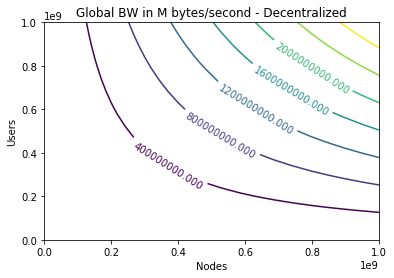

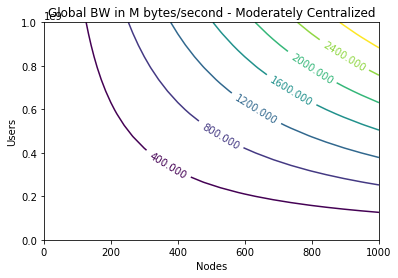

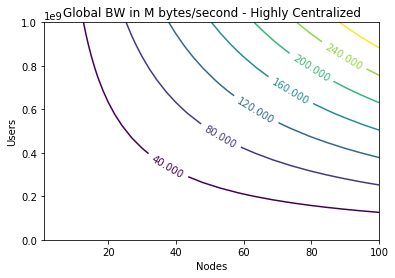

In [13]:
# Global Bandwidth for small large number of nodes

Nx = np.linspace(1,1e9,20) 
ux = np.linspace(1,1e9,20)
SN,Su = np.meshgrid(Nx,ux)

plt.figure()
cp = plt.contour(Nx, ux, SN*Su*t*m/1000000.0)
plt.clabel(cp, inline=True, fontsize=10)
plt.title('Global BW in M bytes/second - Decentralized')
plt.xlabel('Nodes')
plt.ylabel('Users')
plt.show()

# --

Nx = np.linspace(1,1000,20) 
ux = np.linspace(1,1e9,20)
SN,Su = np.meshgrid(Nx,ux)

plt.figure()
cp = plt.contour(Nx, ux, SN*Su*t*m/1000000.0)
plt.clabel(cp, inline=True, fontsize=10)
plt.title('Global BW in M bytes/second - Moderately Centralized')
plt.xlabel('Nodes')
plt.ylabel('Users')
plt.show()

# --

Nx = np.linspace(1,100,20) 
ux = np.linspace(1,1e9,20)
SN,Su = np.meshgrid(Nx,ux)

plt.figure()
cp = plt.contour(Nx, ux, SN*Su*t*m/1000000.0)
plt.clabel(cp, inline=True, fontsize=10)
plt.title('Global BW in M bytes/second - Highly Centralized')
plt.xlabel('Nodes')
plt.ylabel('Users')
plt.show()


The analysis for network bandwidth shows that for highly centralized systems, which maybe similar to 1 central node per country, the total bandwith consumption is low at approximately 40 to 240 MB/sec on average for up to 1B users. When we consider a more mid level centralization, allowing for 10 nodes per country, we see total bandwidth increase to a level of 400 to 2,400 MB/sec.  Finally, the highly decentralized versions requires a global bandwidth that can range in the order of 100,000 GB/sec.  

Network Bandwith Cost:  
While the bandwith assumption leave out many factors such as routing efficencies, multi-cast capabilities, flooding methods, and more, we may still consider them to be a basis value that is in the correct order of magnitude.  We now assume a cost per MB/sec at the core network and from this we may infer costs per user as well.

While many refernce points exist and the cost of BW ranges widely from courntry to counrty, we will start with a US Benchmark of 10 dollars/1Mbit per month or approximately 80 dollars/Mbyte per month or 960 dollars/Mbyte*year'. 
See https://blog.cloudflare.com/the-relative-cost-of-bandwidth-around-the-world/

For Centralized systems: 40 to 240 MB/sec equates to approximately 40k to 240k dollars / year.  For moderate centralization, we see a global cost of 10X which is still negliible on a global scale.  The total BW cost is bounded by a per user cost of u x t x m (in Mbytes/year) * 960/year = $3044/user per year, given our parameter default values.

To achieve a practical global cost of $10/year, a min node factor of approximately 300 or more users per node would be required.  See graphs below.


In [84]:
# Bounded network cost per user at 1B users
u * t * m * 960 / 1000000

3044.1400304414

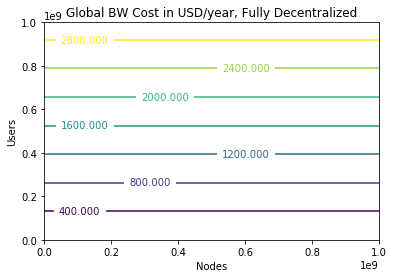

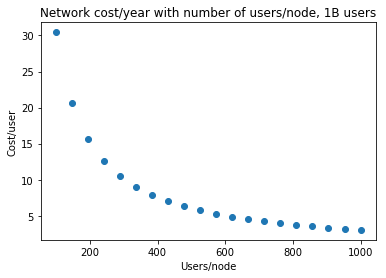

In [16]:
# Network Cost per user for large scale

Nx = np.linspace(1,1e9,200) 
ux = np.linspace(1,1e9,200)
SN,Su = np.meshgrid(Nx,ux)

CTBW = Su * t * m * 960 / 1000000

plt.figure()
cp = plt.contour(Nx, ux, CTBW)
plt.clabel(cp, inline=True, 
          fontsize=10)
plt.title('Global BW Cost in USD/year, Fully Decentralized')
plt.xlabel('Nodes')
plt.ylabel('Users')
plt.show()

#---

n = np.linspace(100,1000,20) 
ux = np.linspace(1,1e9,20)
cp = plt.plot(n, 1e9 * t * m * 960 / (1000000 * n),'o' )
plt.title('Network cost/year with number of users/node, 1B users')
plt.xlabel('Users/node')
plt.ylabel('Cost/user')
plt.show()

From the combined analysis of Network cost and Storage/Compute Costs, we can roughly estimate that for a large scale systems with 1B users, ther cost per user for both Network and Storage become 3044 + 3000 = approx 6000 dollars/user. To reach a cost point that serves a global scale, the number of users / node is likely to be over 1000 for every centralized node in today's cost of bandwidth and networks.   

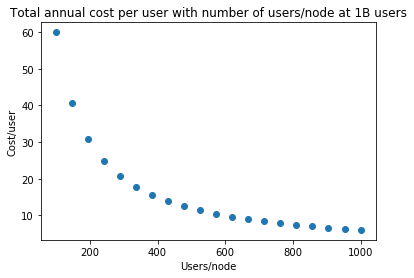

In [122]:
n = np.linspace(100,1000,20) 
ux = np.linspace(1,1e9,20)

cp = plt.plot(n, 6000/n,'o' )

plt.title('Total annual cost per user with number of users/node at 1B users')
plt.xlabel('Users/node')
plt.ylabel('Cost/user')
plt.show()


And finally, if we assumed each user was its own full node, then the bandwith at each node would be: tbw = N  u m t = u^2 m t
By plotting the size of links required for a population of nodes, we can see the link speed required per user in this important case.  

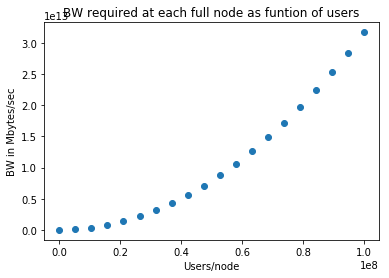

In [17]:
ux = np.linspace(1,1e8,20)
cp = plt.plot(ux, ux*ux*m*t,'o' )
plt.title('BW required at each full node as funtion of users')
plt.xlabel('Users/node')
plt.ylabel('BW in Mbytes/sec')
plt.show()

From this graph, we can infer that when the number of nodes increases past 60,000,000 the bandwdith required simply for updates will be over 1 MB/sec streamed for the entire year. This is an apprimate link rate of a DSL or cable modem line today. A node using this bandwidth would not be able to use its bandwidth for other functions such as streaming video or other intrnet usage.  This level would an order of magnitude above the typical per person internet level usage today.  So at a personal node level, it becomes impractical for an individual to maintain a node with populations of users in this order of magnitude (ie approx. 60M users).    

![Utility](bc-util.jpg)

In this analysis, we have seen that greater numbers of nodes require more resources on a global scale in both storage as well as network utilization.  However, we still seek to understand the benefit from an architecture of this type.  In te diagram above, we note that moving from one node to two nodes provides a funciton of backup.  Increased number of nodes provides resiliance to a point, however past some number, say 10, the value of the increased resilance starts to diminish.  At scales of 10 to 100, we see loose collaboration networks among players that require a common transaction ledger or even a common database.  These player likely have some trust relationship, but not a full trust relaitonship and a node based system of this size solves this problem of semi-trusting partners.

We also see the marginally increasing value of a global network, where users may connect with one of many interconnected nodes and that all of those nodes share data as needed with each other and offer trust, customer service, and other values to thier client users.  This model is actually the same as the global banking system today.  It could be replicated in a similar manner where the number of independent banks could be the number of nodes that are needed in the world.  The resoruce utilization of this type of network is not prohibitive on a per user basis according to our analysis.

In systems that scale to each user or very large number of users keeping thier own transactions, we do not see marginal benefit that outweights the resoruce utilization. This is for two reasonons: 1) the resoruces required per user will be greater than the current banking system which is ultimately much more scaleable since each user does not synchrinize the trasactions of every other user, and 2) the large majority of users prefer to have a trusted authority to manage and resolve issues that may occur.  We have seen this as a reason why peer to peer communication networks have also not been adopted, even in instant messaging. In fact, users of network services also prefer not to maintain thier own directories and/or equipment, and further they prefer options to have customer supoort, techncial support, and other resolution capabilities.

